# Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report

# Create Data

In [2]:
np.random.seed(11)  

# Number of samples
n_samples = 500

# Generate synthetic data for weights (in kg)
weights = np.random.uniform(50, 120, n_samples)

# Generate synthetic data for heights (in cm) and convert to meters
heights = np.random.normal(170, 10, n_samples) / 100  # Convert to meters

# Calculate BMI
bmi = weights / (heights ** 2)

# Obese if BMI >= 30
obese = (bmi >= 30).astype(int)

# Add noise (if needed)
noise_factor = 0.05
n_noisy = int(noise_factor * n_samples)

# Randomly choose indices to flip
noisy_indices = np.random.choice(n_samples, n_noisy, replace=False)

# Flip labels at noisy indices
obese[noisy_indices] = 1 - obese[noisy_indices]

# Create a DataFrame
data = pd.DataFrame({
    'weight': weights,
    'height': heights,
    'obese': obese
})

# Display the first few rows of the DataFrame
data.head()

,weight,height,obese
0,62.618878,1.729467,0
1,51.363267,1.595362,0
2,82.425297,1.765446,0
3,100.745375,1.705937,1
4,79.414252,1.754890,0


# Visualize

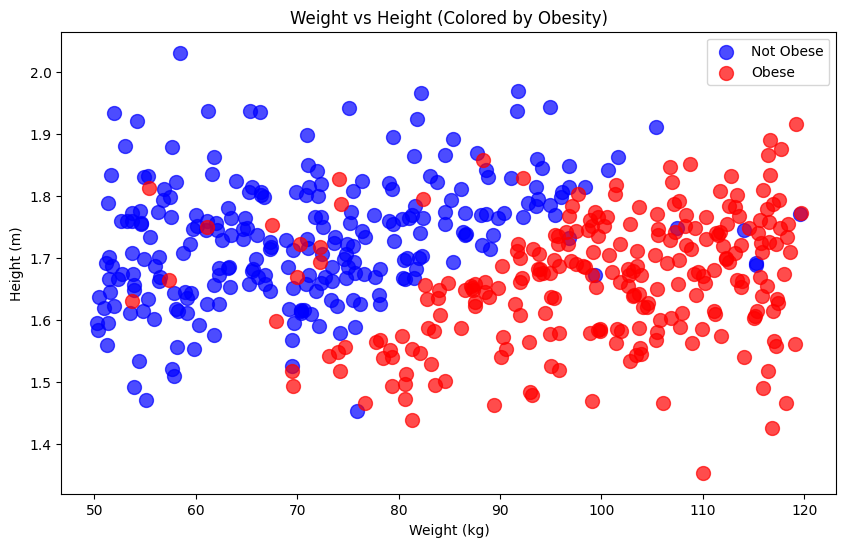

In [3]:
# Create a scatter plot
plt.figure(figsize=(10, 6))

# Plot non-obese individuals
plt.scatter(data[data['obese'] == 0]['weight'], data[data['obese'] == 0]['height'], 
            color='blue', label='Not Obese', alpha=0.7, s=100)

# Plot obese individuals
plt.scatter(data[data['obese'] == 1]['weight'], data[data['obese'] == 1]['height'], 
            color='red', label='Obese', alpha=0.7, s=100)

# Add labels and title
plt.title('Weight vs Height (Colored by Obesity)')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (m)')
plt.legend()

# Show plot
plt.show()

# X and Y

In [4]:
X = data[['weight','height']]
y = data['obese']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

# Set Model

In [5]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [6]:
model.coef_

array([[ 0.11046222, -3.74656343]])

In [7]:
model.intercept_

array([-3.00056036])

# Test

In [8]:
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(x_test)

In [9]:

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.84      0.89        79
           1       0.84      0.94      0.89        71

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150



# Visualize

In [10]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

/home/mikey/miniconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


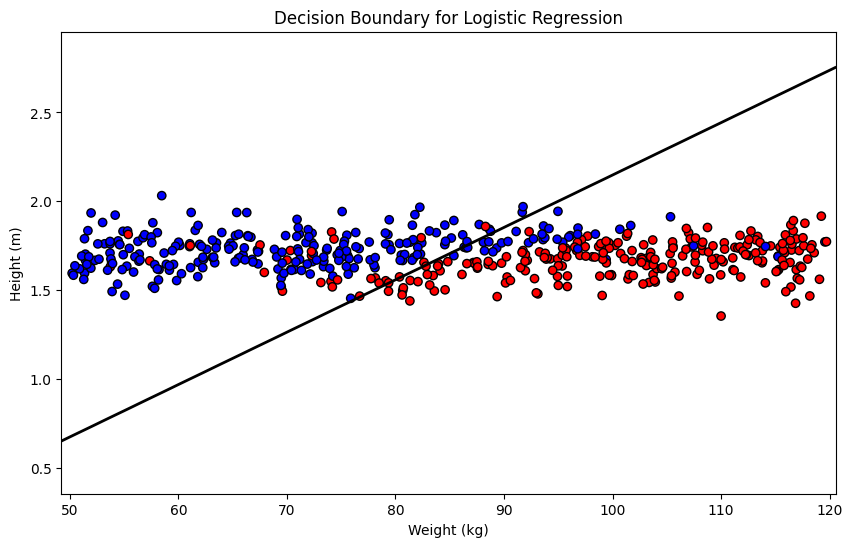

In [11]:
x_min, x_max = X['weight'].min() - 1, X['weight'].max() + 1
y_min, y_max = X['height'].min() - 1, X['height'].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict on the mesh grid
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)
plt.scatter(X['weight'], X['height'], c=y, edgecolor='k', cmap=ListedColormap(['blue', 'red']))
plt.xlabel('Weight (kg)')
plt.ylabel('Height (m)')
plt.title('Decision Boundary for Logistic Regression')
plt.show()